# The Critical Influence of Air Pollution and Socioeconomic Status on Cardiovascular Disease Morbidity and Mortality Rates in the U.S. with Public Health and Social Justice Implications
### Bayowa Onabajo
### Department of Applied Data Science and Analytics, Howard University
### Prof LaKeta Kemp
### February 9, 2025

# Research question: 
How do air pollution and socioeconomic status interact to influence cardiovascular disease morbidity and mortality rates across U.S. states, and what are the public health and social justice implications of these disparities?

# Problem statement: 
Cardiovascular disease (CVD) is a leading cause of death in the United States, with growing evidence suggesting that air pollution exposure measured as particulate matter 2.5(PM 2.5) influences cardiovascular morbidity, mortality and this disproportionately affects low-income populations. Individuals from lower socioeconomic backgrounds are more likely to live in areas with higher pollution levels, overcrowding, limited healthcare access, and economic stressors that contribute to CVD risk factors such as hypertension. These inequalities raise concerns about how socioeconomic and environmental conditions intersect in shaping public health outcomes. To what degree does air pollution and socioeconomic status influence cardiovascular mortality rates in disadvantaged populations?

# Data Definition 

### American Community Survey: 5-Year Estimates.
Last Updated: July 19, 2023.
https://catalog.data.gov/dataset/american-community-survey-5-year-estimates-data-profiles-5-year
This dataset consists of 2400 variables as part of the American community survey which provides data annually. The dataset covers broad social, housing, economic and demographic variables in all U.S. nations, states, districts, counties.The data are presented as counts and percentages. The variables from the 2022 ACS5 dataset were used in this paper as they give more statistical reliability than ACS1.

### PM2.5 and cardiovascular mortality rate.
Last Updated: November 12, 2020
https://catalog.data.gov/dataset/annual-pm2-5-and-cardiovascular-mortality-rate-data-trends-modified-by-county-socioeconomi
The dataset comprises socioeconomic status information for 2,132 counties across the United States, provided by the U.S. Environmental Protection Agency. It also includes average annual cardiovascular mortality rates and total particulate matter 2.5 concentrations for each county over a 21-year span (1990–2010). The cardiovascular mortality data was collected from the U.S. National Center for Health Statistics, while PM2.5 levels were estimated using the EPA’s Community Multiscale Air Quality (CMAQ) modeling system. Additionally, socioeconomic data was extracted from the U.S. Census Bureau. 

### Heart Disease Mortality by State.
Last Updated: February 25, 2022
https://www.cdc.gov/nchs/pressroom/sosmap/heart_disease_mortality/heart_disease.htm
The dataset shows the number of deaths per 100,000 population attributed to heart disease in U.S. states with variables like death rate and number of deaths. It also adjusts for differences in age distribution and population size.



### Hypertension Mortality by State
Last Updated: March 3, 2022
https://www.cdc.gov/nchs/pressroom/sosmap/hypertension_mortality/hypertension.htm
The dataset shows the number of deaths per 100,000 population attributed to hypertension in U.S. states with variables like death rate and number of deaths. It also adjusts for differences in age distribution and population size.






In [7]:
# Import libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_annual_PM25_CMR.csv')

# Create the Dataframe
df_annualcounty_pm25_cmr = pd.DataFrame(path)

In [9]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_SES_index_quintile.csv')

# Create the Dataframe
df_county_sespm25_index_quintile = pd.DataFrame(path)

In [10]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/data-table-heart-dx-mort.csv')

# Create the Dataframe
df_heart_dx_mort = pd.DataFrame(path)

In [11]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/data-table-htn-dx-mort.csv')

# Create the Dataframe
df_htn_dx_mort = pd.DataFrame(path)

In [12]:
# Read the dataset
path = pd.read_csv('/Users/bayowaonabajo/Downloads/acs_2022_states.csv')

# Create the Dataframe
df_acs_2022_states = pd.DataFrame(path)  

In [13]:
#Extraction of the socioeconomic variables needed in the ACS5 dataset was done with code using API key and the variables where stored in the table used for this analysis. Prior to extraction of the variables needed, the variables had no missing values and there was no need to drop any values also to maintain a robust dataset.Code for extraction is given here in markdown:

#import censusdata
#import requests
#import pandas as pd

#censusdata.census_api_key = "e06a3ef2522b01fbf59f0fb986f724a11ed67dd2"  # api key

#Define API endpoint and parameters
#base_url = "https://api.census.gov/data/2022/acs/acs5"
#variables = "NAME,B19013_001E,B17001_001E,B17001_002E,B27010_001E,B27010_017E,B15003_001E,B15003_022E"  # variables
#state_code = "*"  # Fetch data for all states

#Variable descriptions:
#NAME: State name
#B19013_001E: Median household income
#B17001_001E: Total population (for poverty rate denominator)
#B17001_002E: Number of people below the poverty level
#B27010_001E: Total population (for uninsured rate denominator)
#B27010_017E: Number of uninsured people
#B15003_001E: Total population aged 25 and older (for education percentage denominator)
#B15003_022E: Number of people with a high school diploma or higher

#API request URL
#url = f"{base_url}?get={variables}&for=state:{state_code}&key={"e06a3ef2522b01fbf59f0fb986f724a11ed67dd2"}"

#API request
#response = requests.get(url)

#Confirm request success
#if response.status_code == 200:
    #print("Data fetched!")
#else:
    #print(f"Error: {response.status_code}")
    #print(response.text)


#Convert JSON to DataFrame
#data = response.json()  # Assign the JSON response to `data`

#header = data[0]  # First row contains column names
#rows = data[1:]   # Remaining rows contain data
#df_acs = pd.DataFrame(rows, columns=header)

#Rename columns for clarity
#df_acs = df_acs.rename(columns={
    #"NAME": "state",
    #"B19013_001E": "median_income",
    #"B17001_001E": "total_population_poverty",
    #"B17001_002E": "poverty_count",
    #"B27010_001E": "total_population_uninsured",
    #"B27010_017E": "uninsured_count",
    #"B15003_001E": "total_population_education",
    #"B15003_022E": "education_count"
#})

#Convert numeric columns to appropriate data types
#numeric_columns = ["median_income", "total_population_poverty", "poverty_count", 
                   #"total_population_uninsured", "uninsured_count", 
                   #"total_population_education", "education_count"]
#df_acs[numeric_columns] = df_acs[numeric_columns].apply(pd.to_numeric, errors="coerce")

#Calculate percentages
#df_acs["poverty_rate"] = (df_acs["poverty_count"] / df_acs["total_population_poverty"]) * 100
#df_acs["uninsured_rate"] = (df_acs["uninsured_count"] / df_acs["total_population_uninsured"]) * 100
#df_acs["education_percent_highschool"] = (df_acs["education_count"] / df_acs["total_population_education"]) * 100

#Display the first few rows
#print(df_acs.head(10))

#Convert to CSV file
#df_acs.to_csv("acs_2022_states.csv", index=False)
#print("Data saved to acs_2022_states.csv")

In [14]:
import pandas as pd

# Load the dataset
Ses_pm25_cmr_data = '/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_annual_PM25_CMR.csv'

df2 = pd.read_csv(Ses_pm25_cmr_data, dtype={'FIPS': str})  

# State FIPS to state abbreviation extracted from FIPS in original ses_pm25_cmr file encoded as two-digit State FIPS code and three-digit county code
state_fips_mapping = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT',
    '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL',
    '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
    '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE',
    '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND',
    '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD',
    '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
    '55': 'WI', '56': 'WY'
}

# Extract state FIPS and map to abbreviations
def extract_state_info(df):
    df['fip_state'] = df['FIPS'].str[:2]  # Extract first two digits
    df['state'] = df['fip_state'].map(state_fips_mapping)
    return df

df2 = extract_state_info(df2)
df2.head()

# update dataset with fip state codes and states
updated_file = '/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_annual_PM25_CMR.csv'
df2.to_csv(updated_file, index=False)

# Display few rows
df2.head()


,Unnamed: 0,FIPS,Year,PM2.5,CMR,fip_state,state
0,1,01001,1990,9.749792,471.758888,01,AL
1,2,01001,1991,9.069443,456.869651,01,AL
2,3,01001,1992,9.105352,520.014377,01,AL
3,4,01001,1993,8.752873,454.436425,01,AL
4,5,01001,1994,9.024049,415.035332,01,AL


In [15]:
import pandas as pd

# Load the dataset
Ses_index_quintile_file = '/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_SES_index_quintile.csv'

df1 = pd.read_csv(Ses_index_quintile_file, dtype={'FIPS': str})  

# State FIPS to state abbreviation extracted from FIPS in original ses_index_quintile file encoded as two-digit State FIPS code and three-digit county code
state_fips_mapping = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT',
    '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL',
    '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
    '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE',
    '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND',
    '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD',
    '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
    '55': 'WI', '56': 'WY'
}

# Extract state FIPS and map to abbreviations
def extract_state_info(df):
    df['fip_state'] = df['FIPS'].str[:2]  # Extract first two digits
    df['state'] = df['fip_state'].map(state_fips_mapping)
    return df

df1 = extract_state_info(df1)
df1.head()

# update dataset with fip state codes and states
updated_file = '/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_SES_index_quintile.csv'
df1.to_csv(updated_file, index=False)

# Display few rows
df1.head()


,Unnamed: 0,FIPS,SES_index_1990,SES_index_2000,SES_index_2010,SES_quintile_1990,SES_quintile_2000,SES_quintile_2010,fip_state,state
0,1,01001,-0.079387,-0.322846,-0.405150,Q3,Q3,Q2,01,AL
1,2,01003,-0.187240,-0.467794,-0.403987,Q3,Q2,Q2,01,AL
2,3,01005,1.279538,2.013751,1.740142,Q5,Q5,Q5,01,AL
3,4,01009,0.124421,-0.375181,-0.405849,Q4,Q3,Q2,01,AL
4,5,01011,2.877256,3.519681,2.617074,Q5,Q5,Q5,01,AL


In [16]:
# Display first ten rows of the dataframe
df_annualcounty_pm25_cmr.head(7)

,Unnamed: 0,FIPS,Year,PM2.5,CMR,fip_state,state
0,1,1001,1990,9.749792,471.758888,1,AL
1,2,1001,1991,9.069443,456.869651,1,AL
2,3,1001,1992,9.105352,520.014377,1,AL
3,4,1001,1993,8.752873,454.436425,1,AL
4,5,1001,1994,9.024049,415.035332,1,AL
5,6,1001,1995,8.404545,352.065432,1,AL
6,7,1001,1996,8.349826,452.984639,1,AL


In [17]:
# Display last ten rows of the dataframe
df_annualcounty_pm25_cmr.tail(7)

,Unnamed: 0,FIPS,Year,PM2.5,CMR,fip_state,state
44765,44766,56037,2004,3.164634,323.950863,56,WY
44766,44767,56037,2005,3.340059,272.988165,56,WY
44767,44768,56037,2006,3.776910,247.510138,56,WY
44768,44769,56037,2007,3.609803,292.450269,56,WY
44769,44770,56037,2008,3.297100,182.189745,56,WY
44770,44771,56037,2009,3.119896,242.828987,56,WY
44771,44772,56037,2010,3.230996,254.860863,56,WY


In [18]:
path = pd.read_csv('/Users/bayowaonabajo/Downloads/SES_PM25_CMR_data-2/County_SES_index_quintile.csv')

df_county_sespm25_index_quintile = pd.DataFrame(path)

In [19]:
df_county_sespm25_index_quintile.head(7)

,Unnamed: 0,FIPS,SES_index_1990,SES_index_2000,SES_index_2010,SES_quintile_1990,SES_quintile_2000,SES_quintile_2010,fip_state,state
0,1,1001,-0.079387,-0.322846,-0.405150,Q3,Q3,Q2,1,AL
1,2,1003,-0.187240,-0.467794,-0.403987,Q3,Q2,Q2,1,AL
2,3,1005,1.279538,2.013751,1.740142,Q5,Q5,Q5,1,AL
3,4,1009,0.124421,-0.375181,-0.405849,Q4,Q3,Q2,1,AL
4,5,1011,2.877256,3.519681,2.617074,Q5,Q5,Q5,1,AL
5,6,1013,1.922153,1.858747,1.680438,Q5,Q5,Q5,1,AL
6,7,1015,0.103711,0.448460,0.913785,Q4,Q4,Q5,1,AL


In [20]:
df_county_sespm25_index_quintile.tail(7)

,Unnamed: 0,FIPS,SES_index_1990,SES_index_2000,SES_index_2010,SES_quintile_1990,SES_quintile_2000,SES_quintile_2010,fip_state,state
2125,2126,56021,-0.670651,-0.549005,-0.629878,Q2,Q2,Q2,56,WY
2126,2127,56023,-0.629250,-0.813853,-1.531148,Q2,Q1,Q1,56,WY
2127,2128,56025,-0.531112,-0.198399,-0.812551,Q2,Q3,Q1,56,WY
2128,2129,56027,0.079366,-0.076657,-1.086471,Q3,Q3,Q1,56,WY
2129,2130,56029,-0.759768,-0.332070,-1.065513,Q1,Q3,Q1,56,WY
2130,2131,56033,-0.622204,-0.256431,-1.048791,Q2,Q3,Q1,56,WY
2131,2132,56037,-1.094225,-0.826271,-1.078800,Q1,Q1,Q1,56,WY


In [21]:
df_heart_dx_mort.head(7)

,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,234.2,14958,/nchs/pressroom/states/alabama/al.htm
1,2022,AK,145.7,1013,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,148.5,14593,/nchs/pressroom/states/arizona/az.htm
3,2022,AR,224.1,8664,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,142.4,66340,/nchs/pressroom/states/california/ca.htm
5,2022,CO,131.4,8389,/nchs/pressroom/states/colorado/co.htm
6,2022,CT,137.8,6899,/nchs/pressroom/states/connecticut/ct.htm


In [22]:
df_heart_dx_mort.tail(7)

,YEAR,STATE,RATE,DEATHS,URL
494,2005,UT,167.9,2872,/nchs/pressroom/states/utah/ut.htm
495,2005,VT,180.5,1234,/nchs/pressroom/states/vermont/vt.htm
496,2005,VA,203.0,14192,/nchs/pressroom/states/virginia/va.htm
497,2005,WA,180.5,10985,/nchs/pressroom/states/washington/wa.htm
498,2005,WV,253.6,5538,/nchs/pressroom/states/westvirginia/wv.htm
499,2005,WI,190.6,11842,/nchs/pressroom/states/wisconsin/wi.htm
500,2005,WY,188.3,952,/nchs/pressroom/states/wyoming/wy.htm


In [138]:
df_htn_dx_mort['YEAR'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2005])

In [23]:
df_htn_dx_mort.head(7)

,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,13.2,849,/nchs/pressroom/states/alabama/al.htm
1,2022,AK,8.6,56,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,11.3,1109,/nchs/pressroom/states/arizona/az.htm
3,2022,AR,12.1,454,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,14.4,6727,/nchs/pressroom/states/california/ca.htm
5,2022,CO,6.4,400,/nchs/pressroom/states/colorado/co.htm
6,2022,CT,7.7,386,/nchs/pressroom/states/connecticut/ct.htm


In [136]:
df_heart_dx_mort['YEAR'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2005])

In [24]:
df_heart_dx_mort.tail(10)

,YEAR,STATE,RATE,DEATHS,URL
491,2005,SD,186.3,1776,/nchs/pressroom/states/southdakota/sd.htm
492,2005,TN,251.2,14946,/nchs/pressroom/states/tennessee/tn.htm
493,2005,TX,220.4,40152,/nchs/pressroom/states/texas/tx.htm
494,2005,UT,167.9,2872,/nchs/pressroom/states/utah/ut.htm
495,2005,VT,180.5,1234,/nchs/pressroom/states/vermont/vt.htm
496,2005,VA,203.0,14192,/nchs/pressroom/states/virginia/va.htm
497,2005,WA,180.5,10985,/nchs/pressroom/states/washington/wa.htm
498,2005,WV,253.6,5538,/nchs/pressroom/states/westvirginia/wv.htm
499,2005,WI,190.6,11842,/nchs/pressroom/states/wisconsin/wi.htm
500,2005,WY,188.3,952,/nchs/pressroom/states/wyoming/wy.htm


In [25]:
df_htn_dx_mort.tail(7)

,YEAR,STATE,RATE,DEATHS,URL
494,2005,UT,6.0,100,/nchs/pressroom/states/utah/utah.htm
495,2005,VT,6.5,44,/nchs/pressroom/states/vermont/vermont.htm
496,2005,VA,7.9,549,/nchs/pressroom/states/virginia/virginia.htm
497,2005,WA,7.5,452,/nchs/pressroom/states/washington/washington.htm
498,2005,WV,11.6,253,/nchs/pressroom/states/westvirginia/westvirgin...
499,2005,WI,7.1,451,/nchs/pressroom/states/wisconsin/wisconsin.htm
500,2005,WY,3.9,20,/nchs/pressroom/states/wyoming/wyoming.htm


In [134]:
# Display first ten rows of the dataframe
df_acs_2022_states.head(7)

,state,median_income,total_population_poverty,poverty_count,total_population_uninsured,uninsured_count,total_population_education,education_count,state.1,poverty_rate,uninsured_rate,education_percent_highschool
0,Alabama,59609,4890427,768897,4944981,39485,3428520,572252,1,15.722492,0.798486,16.690934
1,Alaska,86370,717293,75227,706392,16409,485871,93744,2,10.487625,2.322931,19.294010
2,Arizona,72581,7017776,916876,7060320,147689,4878959,958447,4,13.065051,2.091817,19.644498
3,Arkansas,56335,2931377,475729,2964272,39858,2031847,317437,5,16.228858,1.344613,15.623076
4,California,91905,38643585,4685272,38874540,312643,26842698,5935292,6,12.124320,0.804236,22.111384
5,Colorado,87598,5653289,540105,5675719,66669,3982760,1083618,8,9.553819,1.174635,27.207715
6,Connecticut,90213,3507563,355692,3567016,22291,2520790,573917,9,10.140716,0.624920,22.767347


In [27]:
# Display last ten rows of the dataframe
df_acs_2022_states.tail(7)

,state,median_income,total_population_poverty,poverty_count,total_population_uninsured,uninsured_count,total_population_education,education_count,state.1,poverty_rate,uninsured_rate,education_percent_highschool
45,Vermont,74014,620877,64739,637608,2532,459033,111614,50,10.427025,0.397109,24.315027
46,Virginia,87249,8379773,836686,8398580,93557,5919142,1366160,51,9.984590,1.113962,23.080372
47,Washington,90325,7553642,747538,7571532,52094,5347314,1244437,53,9.896392,0.688025,23.272189
48,West Virginia,55217,1736883,291860,1759522,12243,1271529,171758,54,16.803665,0.695814,13.507989
49,Wisconsin,72458,5743164,611661,5815677,54038,4047831,852632,55,10.650244,0.929178,21.063923
50,Wyoming,72495,564105,60134,567826,12762,391802,71313,56,10.660072,2.247519,18.201285
51,Puerto Rico,24002,3242916,1368360,3244866,18249,2400393,482139,72,42.195358,0.562396,20.085836


In [28]:
df_annualcounty_pm25_cmr.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44772 entries, 0 to 44771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  44772 non-null  int64  
 1   FIPS        44772 non-null  int64  
 2   Year        44772 non-null  int64  
 3   PM2.5       44772 non-null  float64
 4   CMR         44772 non-null  float64
 5   fip_state   44772 non-null  int64  
 6   state       44772 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 2.4+ MB


In [29]:
# This is the number of rows and columns in the data
df_annualcounty_pm25_cmr.shape

(44772, 7)

The dataframe has 44772  rows and 7 columns.
The total number of datapoints expected is 313404

In [31]:
df_county_sespm25_index_quintile.shape

(2132, 10)

 The dataframe has 2132  rows and 8 columns
The total number of datapoints expected is 17056

In [33]:
df_county_sespm25_index_quintile.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2132 non-null   int64  
 1   FIPS               2132 non-null   int64  
 2   SES_index_1990     2132 non-null   float64
 3   SES_index_2000     2132 non-null   float64
 4   SES_index_2010     2132 non-null   float64
 5   SES_quintile_1990  2132 non-null   object 
 6   SES_quintile_2000  2132 non-null   object 
 7   SES_quintile_2010  2132 non-null   object 
 8   fip_state          2132 non-null   int64  
 9   state              2132 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 166.7+ KB


In [34]:
df_heart_dx_mort.shape

(501, 5)

 The dataframe has 501 rows and 5 columns
 The total number of datapoints expected is 2505

In [36]:
df_heart_dx_mort.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    501 non-null    int64  
 1   STATE   501 non-null    object 
 2   RATE    501 non-null    float64
 3   DEATHS  501 non-null    object 
 4   URL     501 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


In [37]:
df_htn_dx_mort.shape

(501, 5)

The dataframe has 501  rows and 5 columns
The total number of datapoints expected is 2505

In [39]:
df_htn_dx_mort.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    501 non-null    int64  
 1   STATE   501 non-null    object 
 2   RATE    501 non-null    float64
 3   DEATHS  501 non-null    object 
 4   URL     501 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


In [40]:
df_acs_2022_states.shape

(52, 12)

The dataframe has 52  rows and 12 columns
The total number of datapoints expected is 624

In [42]:
df_acs_2022_states.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         52 non-null     object 
 1   median_income                 52 non-null     int64  
 2   total_population_poverty      52 non-null     int64  
 3   poverty_count                 52 non-null     int64  
 4   total_population_uninsured    52 non-null     int64  
 5   uninsured_count               52 non-null     int64  
 6   total_population_education    52 non-null     int64  
 7   education_count               52 non-null     int64  
 8   state.1                       52 non-null     int64  
 9   poverty_rate                  52 non-null     float64
 10  uninsured_rate                52 non-null     float64
 11  education_percent_highschool  52 non-null     float64
dtypes: float64(3), int64(8), object(1)
memory usage: 5.0+ KB


In [43]:
df_annualcounty_pm25_cmr.head(10)

,Unnamed: 0,FIPS,Year,PM2.5,CMR,fip_state,state
0,1,1001,1990,9.749792,471.758888,1,AL
1,2,1001,1991,9.069443,456.869651,1,AL
2,3,1001,1992,9.105352,520.014377,1,AL
3,4,1001,1993,8.752873,454.436425,1,AL
4,5,1001,1994,9.024049,415.035332,1,AL
5,6,1001,1995,8.404545,352.065432,1,AL
6,7,1001,1996,8.349826,452.984639,1,AL
7,8,1001,1997,8.509100,420.085364,1,AL
8,9,1001,1998,8.566814,486.994750,1,AL
9,10,1001,1999,9.059593,417.782427,1,AL


In [132]:
df_annualcounty_pm25_cmr['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [44]:
#create a list of the columns in the dataset
df_annualcounty_pm25_cmrCol = df_annualcounty_pm25_cmr.columns 
df_annualcounty_pm25_cmrCol


Index(['Unnamed: 0', 'FIPS', 'Year', 'PM2.5', 'CMR', 'fip_state', 'state'], dtype='object')

In [45]:
# Update the Headers for Consistency

df_annualcounty_pm25_cmrCol = df_annualcounty_pm25_cmr.rename(columns = {'Unnamed: 0':'indexes'})

# view the new columns and update the variable

df_annualcounty_pm25_cmrCol.head(10)

,indexes,FIPS,Year,PM2.5,CMR,fip_state,state
0,1,1001,1990,9.749792,471.758888,1,AL
1,2,1001,1991,9.069443,456.869651,1,AL
2,3,1001,1992,9.105352,520.014377,1,AL
3,4,1001,1993,8.752873,454.436425,1,AL
4,5,1001,1994,9.024049,415.035332,1,AL
5,6,1001,1995,8.404545,352.065432,1,AL
6,7,1001,1996,8.349826,452.984639,1,AL
7,8,1001,1997,8.509100,420.085364,1,AL
8,9,1001,1998,8.566814,486.994750,1,AL
9,10,1001,1999,9.059593,417.782427,1,AL


In [46]:
# Determine the number of missing values
df_annualcounty_pm25_cmrCol.isnull().sum()

indexes      0
FIPS         0
Year         0
PM2.5        0
CMR          0
fip_state    0
state        0
dtype: int64

In [47]:
# determine the percentage of missing values
# Typically less than five percent missing values may not affect the results
# More than 5% can be dropped, replaced with existing data, or imputed using mean or median.

def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_annualcounty_pm25_cmrCol)

Percentage of missing values in the dataset:
 indexes      0.0
FIPS         0.0
Year         0.0
PM2.5        0.0
CMR          0.0
fip_state    0.0
state        0.0
dtype: float64



I have no missing values in this dataset which is good for my analysis as it allows for a faster and complete statistical analysis, exploration and visualization


In [49]:
# create a list of the columns in the dataset
df_county_sespm25_index_quintileCol = df_county_sespm25_index_quintile.columns 
df_county_sespm25_index_quintileCol


Index(['Unnamed: 0', 'FIPS', 'SES_index_1990', 'SES_index_2000',
       'SES_index_2010', 'SES_quintile_1990', 'SES_quintile_2000',
       'SES_quintile_2010', 'fip_state', 'state'],
      dtype='object')

In [50]:
# Update the Headers for Syntax Consistency

df_county_sespm25_index_quintileCol = df_county_sespm25_index_quintile.rename(columns = {'Unnamed: 0':'indexes'})

# view the new columns and update the variable

df_county_sespm25_index_quintileCol.head(10)

,indexes,FIPS,SES_index_1990,SES_index_2000,SES_index_2010,SES_quintile_1990,SES_quintile_2000,SES_quintile_2010,fip_state,state
0,1,1001,-0.079387,-0.322846,-0.405150,Q3,Q3,Q2,1,AL
1,2,1003,-0.187240,-0.467794,-0.403987,Q3,Q2,Q2,1,AL
2,3,1005,1.279538,2.013751,1.740142,Q5,Q5,Q5,1,AL
3,4,1009,0.124421,-0.375181,-0.405849,Q4,Q3,Q2,1,AL
4,5,1011,2.877256,3.519681,2.617074,Q5,Q5,Q5,1,AL
5,6,1013,1.922153,1.858747,1.680438,Q5,Q5,Q5,1,AL
6,7,1015,0.103711,0.448460,0.913785,Q4,Q4,Q5,1,AL
7,8,1017,0.660426,0.829457,1.443492,Q4,Q5,Q5,1,AL
8,9,1021,0.492201,0.316738,0.340982,Q4,Q4,Q4,1,AL
9,10,1023,1.802146,1.774375,0.742904,Q5,Q5,Q5,1,AL


In [51]:
# Determine the number of missing values

df_county_sespm25_index_quintileCol.isnull().sum()

indexes              0
FIPS                 0
SES_index_1990       0
SES_index_2000       0
SES_index_2010       0
SES_quintile_1990    0
SES_quintile_2000    0
SES_quintile_2010    0
fip_state            0
state                0
dtype: int64

In [52]:
#  function to determine the percentage of missing values
# Typically less than five percent missing values may not affect the results
# More than 5% can be dropped, replaced with existing data, or imputed using mean or median.

def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_county_sespm25_index_quintileCol)

Percentage of missing values in the dataset:
 indexes              0.0
FIPS                 0.0
SES_index_1990       0.0
SES_index_2000       0.0
SES_index_2010       0.0
SES_quintile_1990    0.0
SES_quintile_2000    0.0
SES_quintile_2010    0.0
fip_state            0.0
state                0.0
dtype: float64


In [54]:
#create a list of the columns in the dataset
df_heart_dx_mortCol = df_heart_dx_mort.columns 
df_heart_dx_mortCol


Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'URL'], dtype='object')

The column names in this cardiovascular disease rate dataset allign with research goals so i will keep them as they are.

In [56]:
df_heart_dx_mort.head(10)

,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,234.2,14958,/nchs/pressroom/states/alabama/al.htm
1,2022,AK,145.7,1013,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,148.5,14593,/nchs/pressroom/states/arizona/az.htm
3,2022,AR,224.1,8664,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,142.4,66340,/nchs/pressroom/states/california/ca.htm
5,2022,CO,131.4,8389,/nchs/pressroom/states/colorado/co.htm
6,2022,CT,137.8,6899,/nchs/pressroom/states/connecticut/ct.htm
7,2022,DE,156.8,2220,/nchs/pressroom/states/delaware/de.htm
8,2022,District of Columbia,182.6,1239,/nchs/pressroom/states/DC/DC1.htm
9,2022,FL,140.9,49877,/nchs/pressroom/states/florida/fl.htm


In [57]:
# Determine the number of missing values

df_heart_dx_mort.isnull().sum()

YEAR      0
STATE     0
RATE      0
DEATHS    0
URL       0
dtype: int64

In [58]:
def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_heart_dx_mort)

Percentage of missing values in the dataset:
 YEAR      0.0
STATE     0.0
RATE      0.0
DEATHS    0.0
URL       0.0
dtype: float64


I have no missing values in this dataset which is also good for my analysis as it allows for a faster and complete statistical analysis, exploration and visualization

In [60]:
#create a list of the columns in the dataset
df_htn_dx_mortCol = df_htn_dx_mort.columns 
df_htn_dx_mortCol

Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'URL'], dtype='object')

The column names in this hypertensive diesase rate dataset allign with research goals so i will keep them as they are.

In [62]:
df_htn_dx_mort.head(10)

,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,13.2,849,/nchs/pressroom/states/alabama/al.htm
1,2022,AK,8.6,56,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,11.3,1109,/nchs/pressroom/states/arizona/az.htm
3,2022,AR,12.1,454,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,14.4,6727,/nchs/pressroom/states/california/ca.htm
5,2022,CO,6.4,400,/nchs/pressroom/states/colorado/co.htm
6,2022,CT,7.7,386,/nchs/pressroom/states/connecticut/ct.htm
7,2022,DE,8.1,113,/nchs/pressroom/states/delaware/de.htm
8,2022,District of Columbia,11.9,82,/nchs/pressroom/states/DC/DC1.htm
9,2022,FL,9.3,3289,/nchs/pressroom/states/florida/fl.htm


In [63]:
# number of missing values

df_htn_dx_mort.isnull().sum()

YEAR      0
STATE     0
RATE      0
DEATHS    0
URL       0
dtype: int64

In [64]:
def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_htn_dx_mort)

Percentage of missing values in the dataset:
 YEAR      0.0
STATE     0.0
RATE      0.0
DEATHS    0.0
URL       0.0
dtype: float64


I have no missing values in this dataset which is also good for my analysis as it allows for a faster and complete statistical analysis, exploration and visualization

In [66]:
#create a list of the columns in the dataset
df_acs_2022_statesCol = df_acs_2022_states.columns 
df_acs_2022_statesCol


Index(['state', 'median_income', 'total_population_poverty', 'poverty_count',
       'total_population_uninsured', 'uninsured_count',
       'total_population_education', 'education_count', 'state.1',
       'poverty_rate', 'uninsured_rate', 'education_percent_highschool'],
      dtype='object')

 The column names in this collated ACS rate dataset allign with research goals so i will keep them as they are.

In [68]:
df_acs_2022_states.head(10)

,state,median_income,total_population_poverty,poverty_count,total_population_uninsured,uninsured_count,total_population_education,education_count,state.1,poverty_rate,uninsured_rate,education_percent_highschool
0,Alabama,59609,4890427,768897,4944981,39485,3428520,572252,1,15.722492,0.798486,16.690934
1,Alaska,86370,717293,75227,706392,16409,485871,93744,2,10.487625,2.322931,19.294010
2,Arizona,72581,7017776,916876,7060320,147689,4878959,958447,4,13.065051,2.091817,19.644498
3,Arkansas,56335,2931377,475729,2964272,39858,2031847,317437,5,16.228858,1.344613,15.623076
4,California,91905,38643585,4685272,38874540,312643,26842698,5935292,6,12.124320,0.804236,22.111384
5,Colorado,87598,5653289,540105,5675719,66669,3982760,1083618,8,9.553819,1.174635,27.207715
6,Connecticut,90213,3507563,355692,3567016,22291,2520790,573917,9,10.140716,0.624920,22.767347
7,Delaware,79325,969075,107790,979853,8413,700364,139213,10,11.122978,0.858598,19.877235
8,District of Columbia,101722,649184,98039,661596,3359,484596,124860,11,15.101882,0.507712,25.765793
9,Florida,67917,21171700,2725633,21300363,336566,15579847,3154240,12,12.873945,1.580095,20.245642


In [69]:
# number of missing values

df_acs_2022_states.isnull().sum()

state                           0
median_income                   0
total_population_poverty        0
poverty_count                   0
total_population_uninsured      0
uninsured_count                 0
total_population_education      0
education_count                 0
state.1                         0
poverty_rate                    0
uninsured_rate                  0
education_percent_highschool    0
dtype: int64

In [70]:
def missing(Dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((Dataframe.isnull().sum() *100/len(Dataframe)), 2).sort_values(ascending=False))
    

missing(df_acs_2022_states)

Percentage of missing values in the dataset:
 state                           0.0
median_income                   0.0
total_population_poverty        0.0
poverty_count                   0.0
total_population_uninsured      0.0
uninsured_count                 0.0
total_population_education      0.0
education_count                 0.0
state.1                         0.0
poverty_rate                    0.0
uninsured_rate                  0.0
education_percent_highschool    0.0
dtype: float64


I have no missing values in this collated ACS dataset which is also good for my analysis as it allows for a faster and complete statistical analysis, exploration and visualization

In [146]:
df_annualcounty_pm25_cmrCol.describe()

,indexes,FIPS,Year,PM2.5,CMR,fip_state
count,44772.000000,44772.000000,44772.000000,44772.000000,44772.000000,44772.000000
mean,22386.500000,30599.787992,2000.000000,7.575133,345.969620,30.500000
std,12924.707463,15140.808961,6.055368,2.135479,81.776077,15.122295
min,1.000000,1001.000000,1990.000000,2.010275,31.153468,1.000000
25%,11193.750000,18162.500000,1995.000000,6.325653,286.379700,18.000000
50%,22386.500000,29164.000000,2000.000000,7.669174,345.432644,29.000000
75%,33579.250000,45019.500000,2005.000000,8.963385,401.922251,45.000000
max,44772.000000,56037.000000,2010.000000,15.555506,722.846408,56.000000


In [148]:
df_heart_dx_mort.describe()

,YEAR,RATE
count,501.000000,501.000000
mean,2016.710579,172.287425
std,4.611515,32.655107
min,2005.000000,114.900000
25%,2015.000000,149.300000
50%,2018.000000,163.400000
75%,2020.000000,192.000000
max,2022.000000,306.400000


In [150]:
df_htn_dx_mort.describe()

,YEAR,RATE
count,501.000000,501.000000
mean,2016.710579,8.628343
std,4.611515,2.518634
min,2005.000000,0.000000
25%,2015.000000,6.900000
50%,2018.000000,8.300000
75%,2020.000000,10.100000
max,2022.000000,20.400000


In [152]:
df_acs_2022_states.describe()

,median_income,total_population_poverty,poverty_count,total_population_uninsured,uninsured_count,total_population_education,education_count,state.1,poverty_rate,uninsured_rate,education_percent_highschool
count,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,5.200000e+01,5.200000e+01,52.000000,52.000000,52.000000,52.000000
mean,73828.057692,6.279199e+06,8.055758e+05,6.334469e+06,80261.423077,4.403873e+06,9.206502e+05,29.788462,12.927873,1.199679,20.606075
std,14182.829754,7.184465e+06,9.271159e+05,7.234358e+06,136090.533153,4.997232e+06,1.080793e+06,16.774557,4.890899,0.586305,2.962968
min,24002.000000,5.641050e+05,6.013400e+04,5.678260e+05,2532.000000,3.918020e+05,7.131300e+04,1.000000,7.325118,0.309610,13.507989
25%,66302.250000,1.788149e+06,1.987075e+05,1.810775e+06,17789.000000,1.256721e+06,2.348180e+05,16.750000,10.472475,0.740193,18.857234
50%,72090.000000,4.260892e+06,5.536855e+05,4.305178e+06,44104.000000,3.033102e+06,5.458665e+05,29.500000,12.017257,1.075619,20.829958
75%,84827.250000,7.151742e+06,8.886032e+05,7.188123e+06,88324.250000,5.026904e+06,1.236849e+06,42.500000,13.691310,1.508585,22.352055
max,101722.000000,3.864358e+07,4.685272e+06,3.887454e+07,914426.000000,2.684270e+07,5.935292e+06,72.000000,42.195358,3.179019,27.207715


In [158]:
df_annualcounty_pm25_cmrColCorr = df_annualcounty_pm25_cmrCol.corr(numeric_only=True)
df_annualcounty_pm25_cmrColCorr

,indexes,FIPS,Year,PM2.5,CMR,fip_state
indexes,1.000000,9.963494e-01,4.685111e-04,-0.048550,-0.022501,9.961756e-01
FIPS,0.996349,1.000000e+00,-9.848765e-14,-0.031119,-0.027027,9.999749e-01
Year,0.000469,-9.848765e-14,1.000000e+00,-0.331087,-0.634749,-9.886661e-14
PM2.5,-0.048550,-3.111911e-02,-3.310874e-01,1.000000,0.409177,-3.191807e-02
CMR,-0.022501,-2.702650e-02,-6.347487e-01,0.409177,1.000000,-2.771248e-02
fip_state,0.996176,9.999749e-01,-9.886661e-14,-0.031918,-0.027712,1.000000e+00


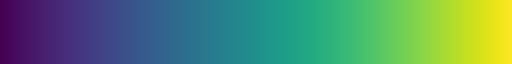

In [161]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

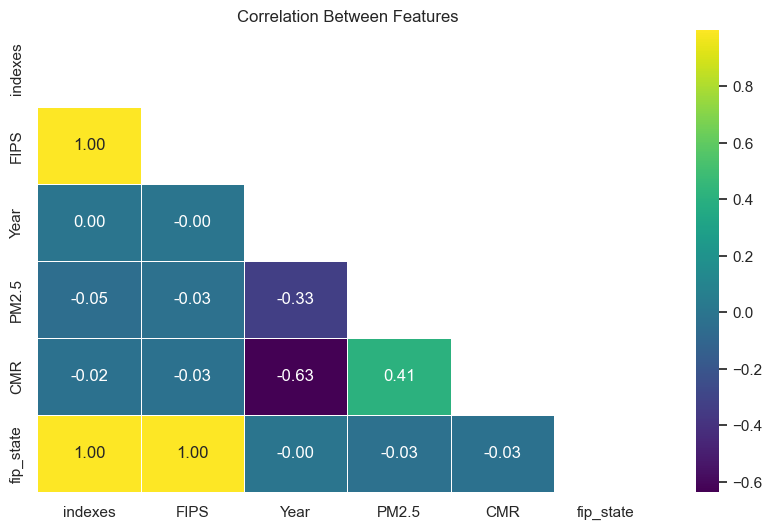

In [166]:
# Create the plot
plt.figure(figsize=(10,6))
matrix = df_annualcounty_pm25_cmrColCorr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(df_annualcounty_pm25_cmrColCorr,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Features')
plt.show()